<a href="https://colab.research.google.com/github/Ashikur-ai/Learn-Machine-Learning/blob/main/1_3_How_to_Handle_Rare_Occurring_Labels_in_machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How to Handle Rare Occurring Labels
##What are labels that occur rarely?

Categorical variables are those whose values are selected from a group of categories, also called labels. Different labels appear in the dataset with different frequencies. Some categories appear more frequently in the dataset, whereas some other categories do not.

For example, in a dataset with information about the oil fields present in the world variable, countries like Saudi Arabia, Kuwait, Iran, Iraq etc might appear frequently than countries in rest of the world like USA, Canada, India or Russia.

In fact, categorical variables often contain a few dominant labels that account for the majority of the observations and a large number of labels may appears for few time only.


#Are Rare Labels in the categorical variable is a problem?
Rare values can add a lot of information or none at all.

For example, consider the above example. Oil prices may not be controlled by only some of major oil producing countries.

The same occurs in real life datasets. The label that is over-represented in the dataset tends to dominate the outcome, and those that are under-represented may have no impact individually, but could have an impact if considered collectively.

#The Effects of Rare Labels
* Rare values in categorical variables tend to cause over-fitting 
* A big number of infrequent labels adds noise
* Rare labels may be present in training set, but not in test set
* Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it.

#Rare Labels Could be Important
Sometimes rare values, are indeed important. For example, if we are building a model for space exploration mission. Most of rarely occuring events could be very important.

Let's start
here we have impoorted the necessary libraries.
* `pandas` is used to read the dataset into a dataframe and perform operations on it

* `numpy` is used to perform basic array operations

* `pyplot` from `matplotlib` is used to visualize the data

* `train_test_split` is used to split the data into training and testing datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']
data = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/houseprice.csv', usecols=cols)
data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


Now we will look at the different number of unique labels in each variable i.e. we will find the cardinality of all the categorical variables. `nunique()` counts the distinct observations.

In [3]:
data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [4]:
data['Neighborhood'].nunique()

25

In [5]:
feature_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in feature_cols:
  print("{}: {}".format(col,data[col].nunique()))

Neighborhood: 25
Exterior1st: 15
Exterior2nd: 16


In [6]:
data.shape

(1460, 4)

In [7]:
 data.isnull().sum()

Neighborhood    0
Exterior1st     0
Exterior2nd     0
SalePrice       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Neighborhood  1460 non-null   object
 1   Exterior1st   1460 non-null   object
 2   Exterior2nd   1460 non-null   object
 3   SalePrice     1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [9]:
total_houses = data.shape[0]
total_houses

1460

Percentages of houses in different locations

In [10]:
temp = data['Neighborhood'].value_counts()/total_houses
temp

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64

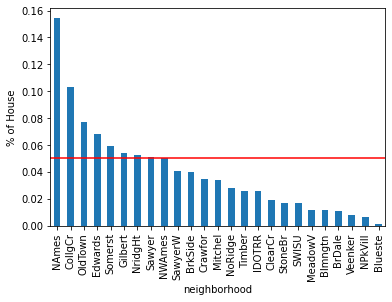

In [11]:
temp.plot.bar()
plt.axhline(y=0.05, color = 'red')
plt.xlabel('neighborhood')
plt.ylabel('% of House')
plt.show()

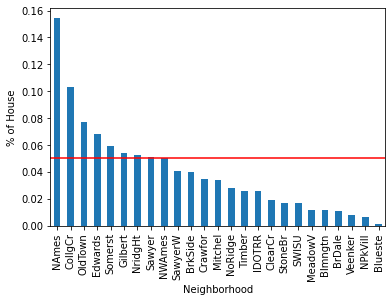

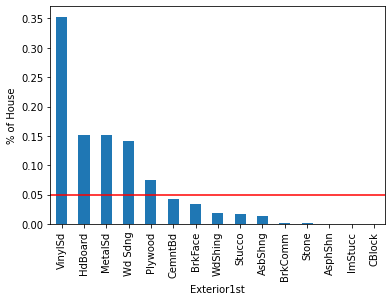

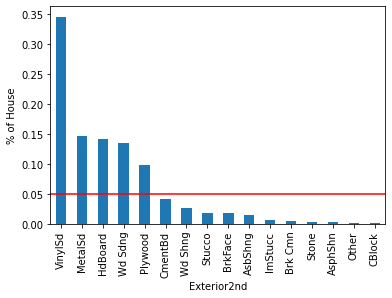

In [12]:
for col in feature_cols:
   
  temp = data[col].value_counts()/total_houses
  temp.plot.bar()
  plt.axhline(y=0.05, color = 'red')
  plt.xlabel(col)
  plt.ylabel('% of House')
  plt.show()

#How is `SalePrice` related to there categories

In [13]:
temp.reset_index()

,index,Exterior2nd
0,VinylSd,0.345205
1,MetalSd,0.146575
2,HdBoard,0.141781
3,Wd Sdng,0.134932
4,Plywood,0.097260
5,CmentBd,0.041096
6,Wd Shng,0.026027
7,Stucco,0.017808
8,BrkFace,0.017123
9,AsbShng,0.013699


In [14]:
data[data['Exterior2nd']=='VinylSd'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


SalePrice    214432.460317
dtype: float64

In [15]:
data.groupby(['Exterior2nd'])['SalePrice'].mean().reset_index()

,Exterior2nd,SalePrice
0,AsbShng,114060.550000
1,AsphShn,138000.000000
2,Brk Cmn,126714.285714
3,BrkFace,195818.000000
4,CBlock,105000.000000
5,CmentBd,230093.833333
6,HdBoard,167661.565217
7,ImStucc,252070.000000
8,MetalSd,149803.172897
9,Other,319000.000000


In [16]:
def get_mean_saleprice_per_categories(df, cat):
  temp = data[col].value_counts()/total_houses
  temp = temp.reset_index()
  temp.columns = [cat, '% of houses']

  mean_price = df.groupby([cat])['SalePrice'].mean().reset_index()

  temp = temp.merge(mean_price, on=cat, how='left')

  return temp

In [20]:
ext_df = get_mean_saleprice_per_categories(data, 'Exterior2nd')
ext_df

,Exterior2nd,% of houses,SalePrice
0,VinylSd,0.345205,214432.460317
1,MetalSd,0.146575,149803.172897
2,HdBoard,0.141781,167661.565217
3,Wd Sdng,0.134932,148386.065990
4,Plywood,0.097260,168112.387324
5,CmentBd,0.041096,230093.833333
6,Wd Shng,0.026027,161328.947368
7,Stucco,0.017808,155905.153846
8,BrkFace,0.017123,195818.000000
9,AsbShng,0.013699,114060.550000


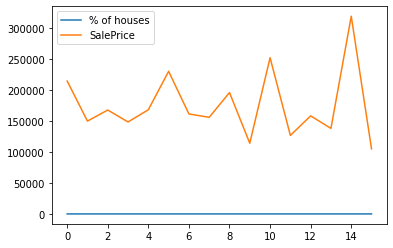

In [21]:
ext_df.plot()

In [27]:
def plot_cats(df, cat):
  fig, ax1 = plt.subplots()
  plt.xticks(df.index, df[cat], rotation=90)

  ax2 = ax1.twinx()
  ax1.bar(df.index, df['% of houses'], color='lightgrey')
  ax2.plot(df.index, df['SalePrice'], color='green', label='House Price')
  ax1.axhline(y=0.05, color='red')
  ax1.set_ylabel('% of houses per category')
  ax1.set_xlabel(cat)

  ax2.set_ylabel('Mean House Price per Category')
  plt.show()

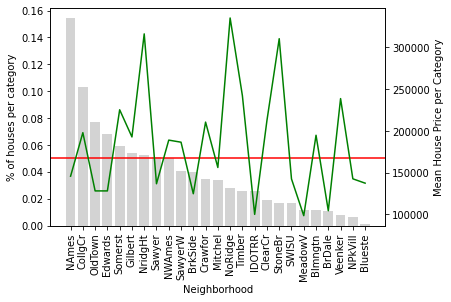

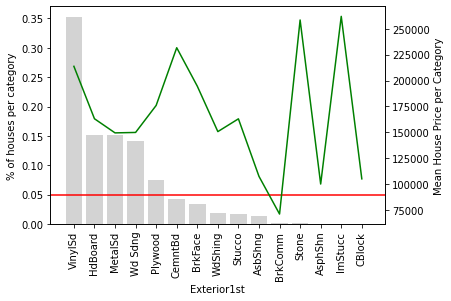

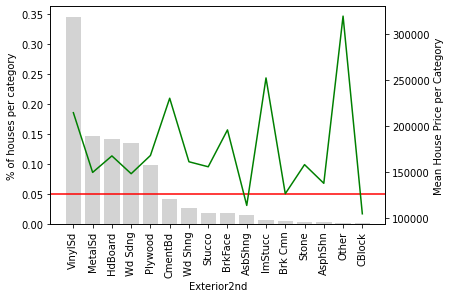

In [28]:
for col in feature_cols:
  temp = get_mean_saleprice_per_categories(data, col)
  plot_cats(temp, col)

In [29]:
(data['Exterior2nd'].value_counts()/total_houses).index

Index(['VinylSd', 'MetalSd', 'HdBoard', 'Wd Sdng', 'Plywood', 'CmentBd',
       'Wd Shng', 'Stucco', 'BrkFace', 'AsbShng', 'ImStucc', 'Brk Cmn',
       'Stone', 'AsphShn', 'Other', 'CBlock'],
      dtype='object')

In [30]:
def rare_labels_grouping(df, cat):
  temp = df[cat].value_counts()/total_houses

  grouping_dict = {
      k: 'rare' if k not in temp[temp>=0.05].index else k for k in temp.index
  }

  t = df[cat].map(grouping_dict)
  return t

In [31]:
rare_labels_grouping(data, 'Exterior2nd').value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
rare       196
Plywood    142
Name: Exterior2nd, dtype: int64

In [32]:
data['Exterior2nd'] = rare_labels_grouping(data, 'Exterior2nd')
data

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,rare,140000
4,NoRidge,VinylSd,VinylSd,250000
...,...,...,...,...
1455,Gilbert,VinylSd,VinylSd,175000
1456,NWAmes,Plywood,Plywood,210000
1457,Crawfor,CemntBd,rare,266500
1458,NAmes,MetalSd,MetalSd,142125


In [33]:
data['Exterior1st'] = rare_labels_grouping(data, 'Exterior1st')

In [34]:
data['Neighborhood'] = rare_labels_grouping(data, 'Neighborhood')

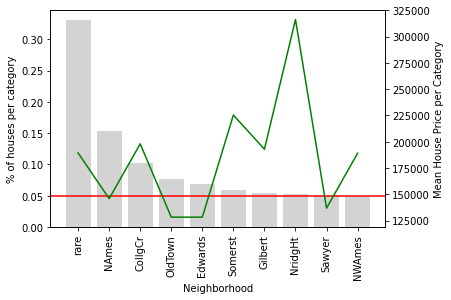

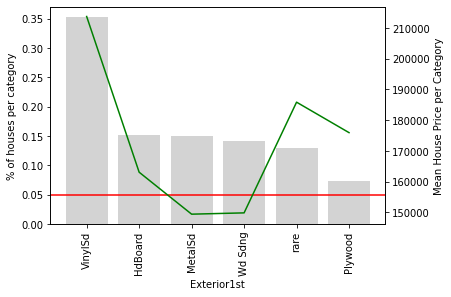

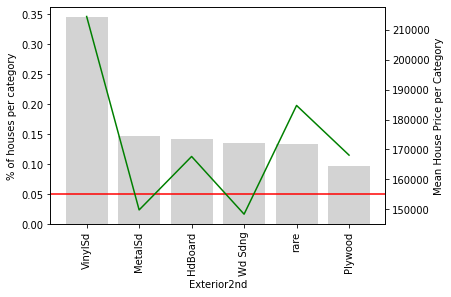

In [35]:
for col in feature_cols:
  temp = get_mean_saleprice_per_categories(data, col)
  plot_cats(temp, col)